# Machine Learning Modeling Using Scaled Dataset

In [1]:
%%capture
%matplotlib inline
import pycaret
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from EDA_Optimized import *
from pycaret.classification import *

### Feature Scaling

#### Data transformation

In [2]:
scaler = StandardScaler()
num_cols = ['age',
 'sex',
 'steroid',
 'antivirals',
 'fatigue',
 'malaise',
 'anorexia',
 'liver_big',
 'liver_firm',
 'spleen_palpable',
 'spiders',
 'ascites',
 'varices',
 'bilirubin',
 'alk_phosphate',
 'sgot',
 'albumin',
 'protime',
 'histology']

#### Create an empty DataFrame

In [3]:
# Create an empty DataFrame to store the copied data
scaled_df = pd.DataFrame()

# Loop through each column name in 'num_cols'
for col in num_cols:
    # Copy the data from the original DataFrame 'ds' to 'scaled_df'
    # This creates a new DataFrame with only the specified columns
    scaled_df[col] = ds[col]

In [4]:
# Loop through each column name in 'num_cols'
for col in num_cols:
    # Reshape the column data to be a 2D array (required by StandardScaler)
    # Fit and transform the column data using the scaler
    # Assign the scaled data to the corresponding column in the new DataFrame
    scaled_df[col] = scaler.fit_transform(ds[col].values.reshape(-1, 1))

In [5]:
ds.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85.0,18.0,4.0,100.0,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135.0,42.0,3.5,100.0,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96.0,32.0,4.0,100.0,0,1
3,31,0,2,1,0,0,0,1,0,0,0,0,0,0.7,46.0,52.0,4.0,80.0,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,85.0,200.0,4.0,100.0,0,1


In [6]:
scaled_df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology
0,-0.894192,2.947457,-1.007106,-0.428026,-1.349131,-0.806236,-0.511177,-1.941451,-0.845945,-0.510061,-0.714735,-0.412082,-0.391848,-0.346128,-0.352069,-0.745341,0.265479,0.848948,-0.907485
1,0.702579,-0.339276,-1.007106,-0.428026,0.701019,-0.806236,-0.511177,-1.941451,-0.845945,-0.510061,-0.714735,-0.412082,-0.391848,-0.430351,0.713349,-0.475100,-0.544545,0.848948,-0.907485
2,2.938059,-0.339276,0.944162,-0.428026,0.701019,-0.806236,-0.511177,0.208013,-0.845945,-0.510061,-0.714735,-0.412082,-0.391848,-0.598796,-0.117677,-0.587701,0.265479,0.848948,-0.907485
3,-0.814353,-0.339276,2.895431,2.336308,-1.349131,-0.806236,-0.511177,0.208013,-0.845945,-0.510061,-0.714735,-0.412082,-0.391848,-0.598796,-1.183096,-0.362500,0.265479,0.064992,-0.907485
4,-0.574838,-0.339276,0.944162,-0.428026,-1.349131,-0.806236,-0.511177,0.208013,-0.845945,-0.510061,-0.714735,-0.412082,-0.391848,-0.346128,-0.352069,1.303983,0.265479,0.848948,-0.907485


In [7]:
scaled_df["class"] = ds["class"]

In [8]:
scaled_df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,-0.894192,2.947457,-1.007106,-0.428026,-1.349131,-0.806236,-0.511177,-1.941451,-0.845945,-0.510061,-0.714735,-0.412082,-0.391848,-0.346128,-0.352069,-0.745341,0.265479,0.848948,-0.907485,1
1,0.702579,-0.339276,-1.007106,-0.428026,0.701019,-0.806236,-0.511177,-1.941451,-0.845945,-0.510061,-0.714735,-0.412082,-0.391848,-0.430351,0.713349,-0.475100,-0.544545,0.848948,-0.907485,1
2,2.938059,-0.339276,0.944162,-0.428026,0.701019,-0.806236,-0.511177,0.208013,-0.845945,-0.510061,-0.714735,-0.412082,-0.391848,-0.598796,-0.117677,-0.587701,0.265479,0.848948,-0.907485,1
3,-0.814353,-0.339276,2.895431,2.336308,-1.349131,-0.806236,-0.511177,0.208013,-0.845945,-0.510061,-0.714735,-0.412082,-0.391848,-0.598796,-1.183096,-0.362500,0.265479,0.064992,-0.907485,1
4,-0.574838,-0.339276,0.944162,-0.428026,-1.349131,-0.806236,-0.511177,0.208013,-0.845945,-0.510061,-0.714735,-0.412082,-0.391848,-0.346128,-0.352069,1.303983,0.265479,0.848948,-0.907485,1


In [9]:
s = setup(data=scaled_df, target='class', session_id=123, normalize=True)

,Description,Value
0,Session id,123
1,Target,class
2,Target type,Binary
3,Original data shape,"(155, 20)"
4,Transformed data shape,"(155, 20)"
5,Transformed train set shape,"(108, 20)"
6,Transformed test set shape,"(47, 20)"
7,Numeric features,19
8,Preprocess,True
9,Imputation type,simple


### Compare models and select the best one

In [10]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8627,0.7889,0.9542,0.8842,0.9173,0.4876,0.5081,0.2060
rf,Random Forest Classifier,0.8536,0.8694,0.9444,0.8831,0.9109,0.4894,0.5164,0.3210
et,Extra Trees Classifier,0.8527,0.8444,0.9306,0.8917,0.9072,0.5009,0.5277,0.2740
gbc,Gradient Boosting Classifier,0.8255,0.8458,0.8972,0.8913,0.8908,0.4205,0.4351,0.2240
lightgbm,Light Gradient Boosting Machine,0.8255,0.8340,0.9083,0.8883,0.8923,0.4252,0.4565,2.0960
ridge,Ridge Classifier,0.8173,0.8229,0.8972,0.8821,0.8864,0.3805,0.3932,0.0710
dt,Decision Tree Classifier,0.8164,0.7653,0.8639,0.9144,0.8789,0.4773,0.4987,0.0580
lr,Logistic Regression,0.8082,0.8160,0.8861,0.8807,0.8799,0.3648,0.3783,1.9090
knn,K Neighbors Classifier,0.8073,0.8031,0.8972,0.8710,0.8805,0.3420,0.3598,0.0850
lda,Linear Discriminant Analysis,0.7991,0.8229,0.8750,0.8789,0.8725,0.3536,0.3676,0.0480


In [11]:
best_model

AdaBoostClassifier(algorithm='SAMME.R', estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=123)

### Get Evaluation Metrics

In [12]:
get_metrics(best_model)

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x7f4eb0ccea20>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(roc_auc_score, response_method=('d...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, response_method='pre...",pred,{'average': 'weighted'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, response_method='...",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, response_method='predict...",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x7f4eb0ccede0>,"make_scorer(cohen_kappa_score, response_method...",pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x7f4eb0ccf060>,"make_scorer(matthews_corrcoef, response_method...",pred,{},True,True,False


## Evaluate the best model

In [13]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### Plot various aspects of the best model

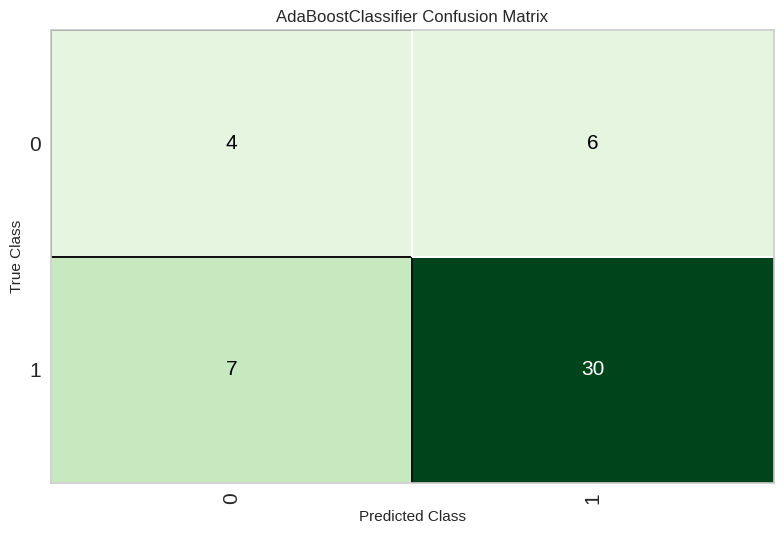

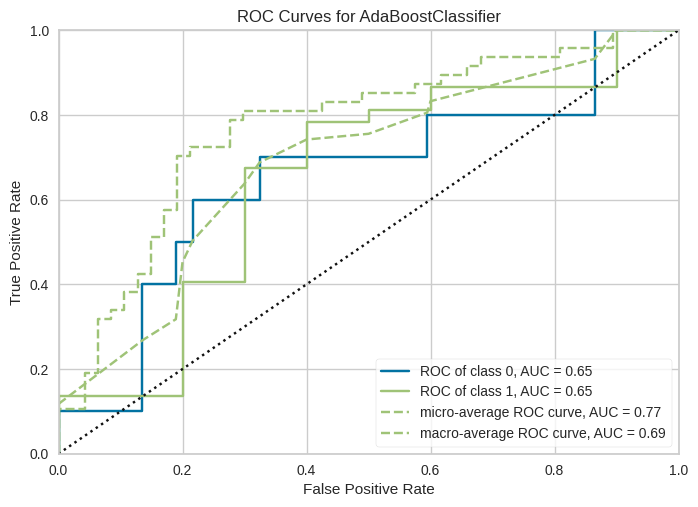

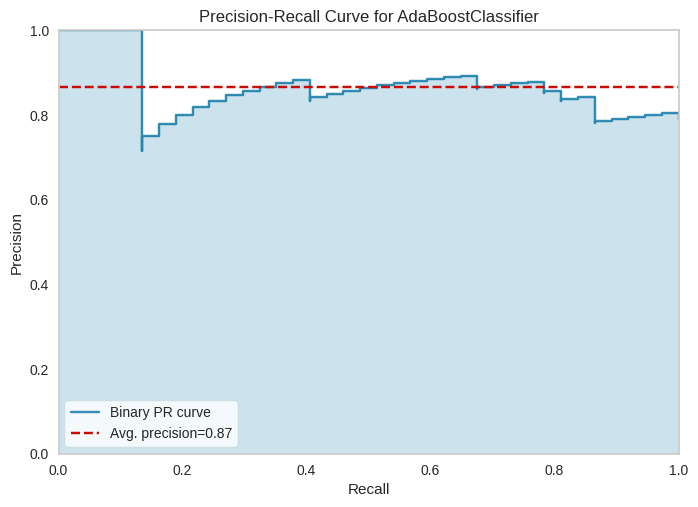

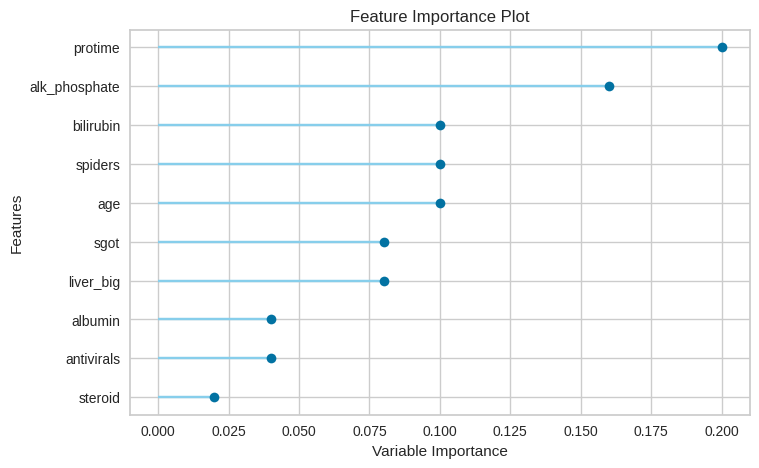

In [14]:
plot_model(best_model, plot='confusion_matrix')
plot_model(best_model, plot='auc')
plot_model(best_model, plot='pr')
plot_model(best_model, plot='feature')

### Making Predictions

In [15]:
predictions = predict_model(best_model)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.7234,0.6541,0.8108,0.8333,0.8219,0.2034,0.2038


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,...,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class,prediction_label,prediction_score
122,0.063871,-0.339276,0.944162,-0.428026,-1.349131,-0.806236,-0.511177,0.208013,-0.845945,1.466426,...,-0.391848,0.074985,-0.352069,-0.497620,0.265479,0.848948,1.101946,1,1,0.5537
44,-0.574838,-0.339276,0.944162,-0.428026,-1.349131,-0.806236,-0.511177,0.208013,-0.845945,-0.510061,...,-0.391848,-0.346128,-0.352069,0.020341,0.265479,0.848948,-0.907485,1,1,0.5535
112,0.862256,-0.339276,-1.007106,-0.428026,0.701019,-0.806236,-0.511177,0.208013,-0.845945,-0.510061,...,-0.391848,-0.346128,-0.352069,-0.610221,0.265479,0.848948,1.101946,1,1,0.5444
75,-0.734515,-0.339276,-1.007106,2.336308,0.701019,1.177360,-0.511177,0.208013,-0.845945,-0.510061,...,-0.391848,-0.346128,-0.991320,-0.441320,0.427483,-0.875754,-0.907485,1,1,0.6094
150,0.383225,-0.339276,0.944162,-0.428026,0.701019,1.177360,1.819189,0.208013,-0.845945,-0.510061,...,1.777310,5.212566,-0.352069,1.776904,-0.868554,-1.110941,1.101946,0,1,0.6573


### Displaying the probability of both classes


In [16]:
predictions_prob = predict_model(best_model, raw_score=True)
predictions_prob.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.7234,0.6541,0.8108,0.8333,0.8219,0.2034,0.2038


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,...,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class,prediction_label,prediction_score_0,prediction_score_1
122,0.063871,-0.339276,0.944162,-0.428026,-1.349131,-0.806236,-0.511177,0.208013,-0.845945,1.466426,...,0.074985,-0.352069,-0.497620,0.265479,0.848948,1.101946,1,1,0.4463,0.5537
44,-0.574838,-0.339276,0.944162,-0.428026,-1.349131,-0.806236,-0.511177,0.208013,-0.845945,-0.510061,...,-0.346128,-0.352069,0.020341,0.265479,0.848948,-0.907485,1,1,0.4465,0.5535
112,0.862256,-0.339276,-1.007106,-0.428026,0.701019,-0.806236,-0.511177,0.208013,-0.845945,-0.510061,...,-0.346128,-0.352069,-0.610221,0.265479,0.848948,1.101946,1,1,0.4556,0.5444
75,-0.734515,-0.339276,-1.007106,2.336308,0.701019,1.177360,-0.511177,0.208013,-0.845945,-0.510061,...,-0.346128,-0.991320,-0.441320,0.427483,-0.875754,-0.907485,1,1,0.3906,0.6094
150,0.383225,-0.339276,0.944162,-0.428026,0.701019,1.177360,1.819189,0.208013,-0.845945,-0.510061,...,5.212566,-0.352069,1.776904,-0.868554,-1.110941,1.101946,0,1,0.3427,0.6573


### Save the best model

In [17]:
save_model(best_model, "scaled_model")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['age', 'sex', 'steroid',
                                              'antivirals', 'fatigue', 'malaise',
                                              'anorexia', 'liver_big',
                                              'liver_firm', 'spleen_palpable',
                                              'spiders', 'ascites', 'varices',
                                              'bilirubin', 'alk_phosphate',
                                              'sgot', 'albumin', 'protime',
                                              'histology'],
                                     transformer=SimpleImputer(add_indica...
                                                               fill_value=None,
                                                               keep_empty_features=False,
                             